In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import RidgeClassifier, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

import matplotlib.pyplot as plt
import seaborn as sns

import json
import warnings
from subprocess import check_output

warnings.filterwarnings('ignore', category=RuntimeWarning)

In [2]:
mushroom=pd.read_csv(r"D:\agent\FLIP ROBO TECH\mushrooms.csv")

In [3]:
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
mushroom.isnull().sum()    #Checking the null values here.

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  


 poisonous to ebible ratio 0.93
poisonous:  3916, edible: 4208


<ipython-input-8-983e59df1e20>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Balance Checking for input class in Mashroom Dataset",Fontsize=14)


<AxesSubplot:title={'center':'Balance Checking for input class in Mashroom Dataset'}, xlabel='class', ylabel='count'>

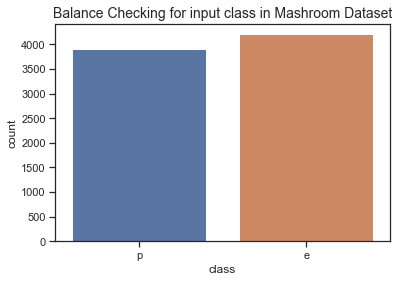

In [8]:
edible= mushroom[mushroom["class"]=="e" ]["class"].count()
poisonous = mushroom[mushroom["class"] =="p" ]["class"].count()
p_e_ratio = poisonous/float(edible)
print("\n poisonous to ebible ratio {}\npoisonous:  {}, edible: {}"
        .format(p_e_ratio.round(2),poisonous,edible))

sns.set(style="ticks", color_codes= True)
plt.title("Balance Checking for input class in Mashroom Dataset",Fontsize=14)
sns.countplot(x= mushroom["class"],data = mushroom)

In [9]:
columns= mushroom.columns.values
for column in columns:
    print("{0}:{1}".format(column, mushroom[column].unique()))
    


class:['p' 'e']
cap-shape:['x' 'b' 's' 'f' 'k' 'c']
cap-surface:['s' 'y' 'f' 'g']
cap-color:['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises:['t' 'f']
odor:['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment:['f' 'a']
gill-spacing:['c' 'w']
gill-size:['n' 'b']
gill-color:['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape:['e' 't']
stalk-root:['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring:['s' 'f' 'k' 'y']
stalk-surface-below-ring:['s' 'f' 'y' 'k']
stalk-color-above-ring:['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring:['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type:['p']
veil-color:['w' 'n' 'o' 'y']
ring-number:['o' 't' 'n']
ring-type:['p' 'e' 'l' 'f' 'n']
spore-print-color:['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population:['s' 'n' 'a' 'v' 'y' 'c']
habitat:['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [10]:
mushroom = mushroom.drop("veil-type",axis =1)
mushroom.shape


(8124, 22)

### In above program  I am Done till the classification of mushroom in posinous and Edible and also differentiate 
### its type using unique function. 

df_corr = mushroom.corr().abs()

plt.figure(figsize= (10,16))
sns.he\atmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()